In [1]:
import pandas as pd

In [4]:
import FinanceDatabase as fd

airlines_us = fd.select_equities(country='United States', industry='Cigarettes')

In [5]:
from yfinance.utils import get_json
from yfinance import download

airlines_us_fundamentals = {}
for symbol in airlines_us:
    try:
        airlines_us_fundamentals[symbol] = get_json("https://finance.yahoo.com/quote/" + symbol)
    except:
        continue

airlines_us_stock_data = download(list(airlines_us))

[*********************100%***********************]  1 of 1 completed


In [6]:
df = pd.DataFrame(airlines_us_stock_data)

In [7]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
df['Adj Close']

Date
2013-05-03    5.0000
2013-05-06    5.0000
2013-05-07    5.0000
2013-05-08    5.0000
2013-05-09    5.0000
               ...  
2021-02-18    0.0018
2021-02-19    0.0018
2021-02-22    0.0018
2021-02-23    0.0018
2021-02-24    0.0018
Name: Adj Close, Length: 1966, dtype: float64

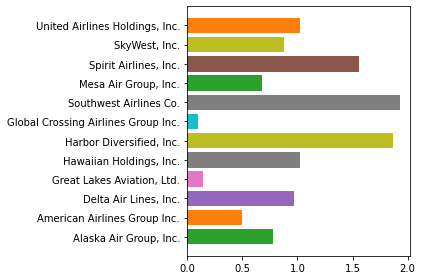

In [30]:
import matplotlib.pyplot as plt

for symbol in airlines_us_fundamentals:
    quick_ratio = airlines_us_fundamentals[symbol]['financialData']['quickRatio']
    long_name = airlines_us_fundamentals[symbol]['quoteType']['longName']

    if quick_ratio is None:
        continue

    plt.barh(long_name, quick_ratio)

plt.tight_layout()
plt.show()

In [54]:
airlines_th = fd.select_equities(country='Thailand', industry='Electronic Components')

In [55]:
for symbol in airlines_th:
    print(symbol)

CIG-R.BK
FORTH-R.BK
FORTH.BK
HANA-R.BK
HANA.BK
KCE-R.BK
KCE.BK
KCEA.SG
METCO-R.BK
METCO.BK
NEX-R.BK
NVAX.F
NVPA.F
SNC-R.BK
SNC.BK
SVI-R.BK
SVI.BK
TEAM-R.BK


In [56]:
import pandas_datareader as web

st = web.DataReader('METCO-R.BK', 'yahoo', '2010-01-01', '2021-01-01')

<AxesSubplot:xlabel='Date'>

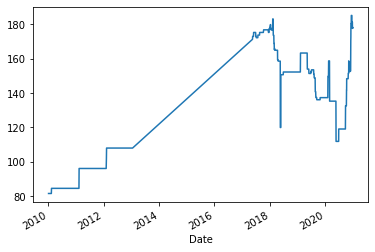

In [57]:
st['Adj Close'].plot()

In [58]:
len(st)

1633